# Fault injection data from Titan V (Volta)

On Volta, it is possible to inject fault only on NVBITFI, the results are available on data/ directory.

In [1]:
import pandas as pd

#load nvbitfi
nvbitfi_df = pd.read_csv("data/avf_volta_nvbitfi.csv", index_col=[0,1])

In [2]:
nvbitfi_df

DGEMM  DHOTSPOT     DLAVA      DMXM     FGEMM  FHOTSPOT     FLAVA  \
    igid                                                                        
SDC FP32  0.00000   0.11125  0.000000  0.000000  0.314667  0.157667  0.132000   
    FP64  0.24250   0.14050  0.155333  0.329000  0.000000  0.000000  0.000000   
    GP    0.23625   0.10125  0.122000  0.080667  0.297333  0.153333  0.105333   
    LD    0.22875   0.13525  0.066667  0.000000  0.309333  0.182667  0.042000   
DUE FP32  0.00000   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
    FP64  0.00000   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
    GP    0.00725   0.01625  0.013333  0.107667  0.008333  0.024000  0.017000   
    LD    0.00000   0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

              FMXM   FYOLOV3  
    igid                      
SDC FP32  0.321333  0.079667  
    FP64  0.000000  0.000000  
    GP    0.066667  0.085333  
    LD    0.000000  0.069667  
DUE FP32  0.000000  0.000000  
    FP64  0.000000  0.000000  
    GP    0.113000  0.020000  
    LD    0.000000  0.002333

In [3]:
# Define a function to plot both graphs
import matplotlib.pyplot as plt
%matplotlib inline

def plot(df):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    df.plot.bar(edgecolor="black", colormap="RdYlBu", ax=fig.gca(), stacked=True)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')


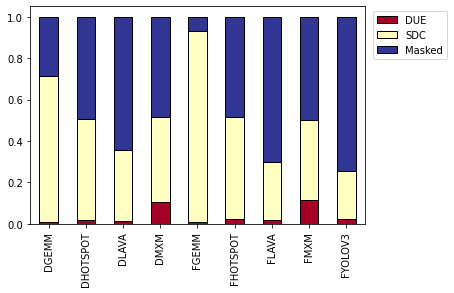

In [4]:
# Group to plot as in the paper for NVBITFI
nvbitfi_df.index.names = ["outcome", "igid"]
nvbitfi_df = nvbitfi_df.groupby(["outcome"]).sum()

# add masked
nvbitfi_df.loc["Masked"] = 1 - nvbitfi_df.sum(axis=0)

#Plot
plot(nvbitfi_df.transpose())